## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [57]:
# Using drive
#from google.colab import drive
#drive.mount('/content/drive')

In [58]:
#Loading Dataset from Kaggle (Don't forget to upload creds 'kaggle.json')
#! pip install kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [59]:
#Download Dataset
#! kaggle datasets download -d mlg-ulb/creditcardfraud

In [60]:
#unzip Dataset
#! unzip creditcardfraud

In [61]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
#observe the different feature type present in the data
print(df.shape[0], 'observations and', df.shape[1], 'features')


284807 observations and 31 features


In [63]:
# What kind of data are we dealing with?
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [64]:
#Fraud vs No Fraud - Highly Imbalanced
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [65]:
#Check for nulls
df.isnull().values.any()
#No nulls, yay!

False

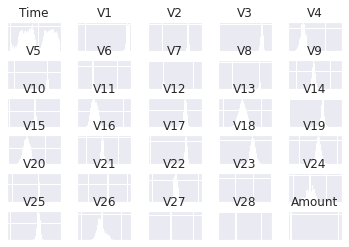

In [66]:
# Distribution of all Variables (PCA)
df_ = df.drop('Class', axis=1)
# create a histogram plot of each numeric variable
ax = df_.hist(bins=100)
# disable axis labels
for axis in ax.flatten():
  axis.set_xticklabels([])
  axis.set_yticklabels([])
plt.show()

Here we will observe the distribution of our classes

In [67]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

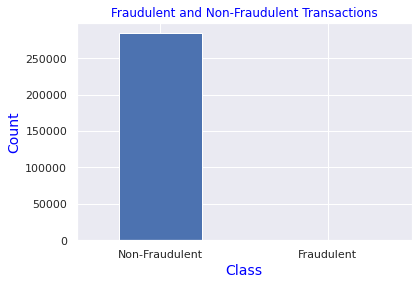

In [68]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions

labels=["Non-Fraudulent", "Fraudulent"]
classes.plot(kind='bar')
plt.title("Fraudulent and Non-Fraudulent Transactions", color='blue')
plt.xticks(range(2), labels, rotation=0)
plt.xlabel('Class', fontsize=14, color='blue')
plt.ylabel('Count', fontsize=14, color='blue')
plt.show()



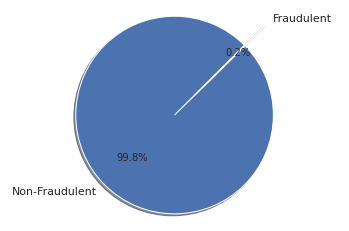

In [69]:
labels = 'Non-Fraudulent', 'Fraudulent'
sizes = [normal_share, fraud_share]
explode = (0, 0.30)
fig1, ax1 = plt.subplots()
ax1.pie(classes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [70]:
# Create a scatter plot to observe the distribution of classes with time

elapse_time= df.drop(['Amount'], axis=1)
values_= elapse_time.drop(['Time','Class'],axis=1)
c_t_dist= pd.pivot_table(df, values=values_, index=['Time'], columns= ['Class'], aggfunc='size').fillna(0)

In [71]:
c_t_dist.head()

Class,0,1
Time,,
0.0,2.0,0.0
1.0,2.0,0.0
2.0,2.0,0.0
4.0,1.0,0.0
7.0,2.0,0.0


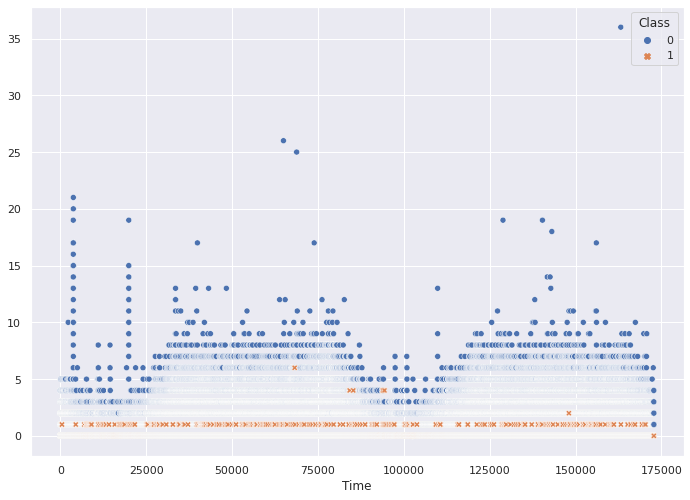

In [72]:
#table= pd.pivot_table(elapse_time, values=values_, index=['Time'], aggfunc=np.count)
#table
#sns.scatterplot(data=df.C, x="Time", y="Class", hue="Class", style="Class")

#df_pivot= pd.pivot_table(df, values=values_, index=['Class'], columns= ['Time'], aggfunc='size')
#df_pivot

#pivot= df.groupby(['Class','Time'],as_index = False).count().pivot('Class','Time').fillna(0)
#class_time= df[['Class', 'Time']]
#class_time.head()



sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=c_t_dist)
plt.show()

In [73]:
# Create a scatter plot to observe the distribution of classes with Amount
print('Max Transaction Amount is', df.Amount.max() , '.')
print('Min Transaction Amount is', df.Amount.min() ,'.')


Max Transaction Amount is 25691.16 .
Min Transaction Amount is 0.0 .


In [74]:
c_a= df[['Amount', 'Class']]
c_a

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
3,123.50,0
4,69.99,0
...,...,...
284802,0.77,0
284803,24.79,0
284804,67.88,0
284805,10.00,0


In [75]:
c_a_dist= pd.pivot_table(c_a, values=c_a, index=['Amount'], columns= ['Class'], aggfunc='size').fillna(0)
c_a_dist.head()

Class,0,1
Amount,,
0.00,1798.0,27.0
0.01,713.0,5.0
0.02,85.0,0.0
0.03,3.0,0.0
0.04,11.0,0.0


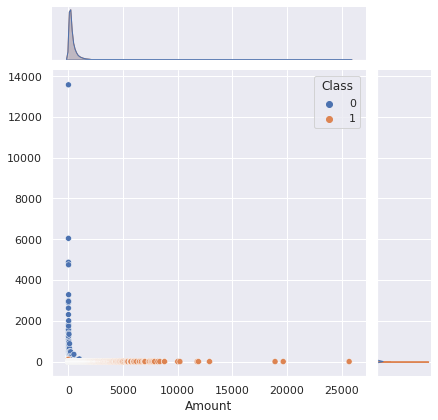

In [76]:
sns.jointplot(data=c_a_dist)

In [77]:
amount_normal= c_a.loc[c_a['Class']==0]
amount_normal= amount_normal.drop('Class',axis=1)
amount_normal= amount_normal.reset_index().drop('index',axis=1)
amount_normal.head()

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99


In [78]:
print(amount_normal.min())
print(amount_normal.max())

Amount    0.0
dtype: float64
Amount    25691.16
dtype: float64


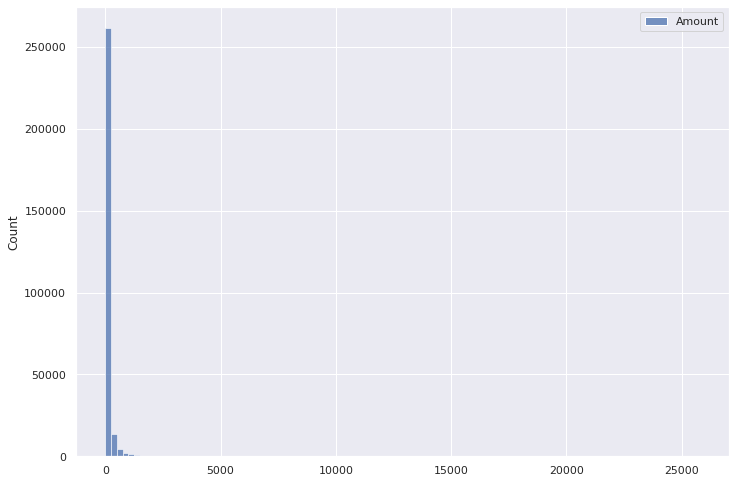

In [79]:
import math
sns.set(rc={'figure.figsize':(11.7,8.27)})
data=amount_normal
sns.histplot(data=data,binwidth=250)
plt.show()

In [80]:
amount_fraud= c_a.loc[c_a['Class']==1]
amount_fraud= amount_fraud.drop('Class',axis=1)
amount_fraud= amount_fraud.reset_index().drop('index',axis=1)
amount_fraud.head()

,Amount
0,0.00
1,529.00
2,239.93
3,59.00
4,1.00


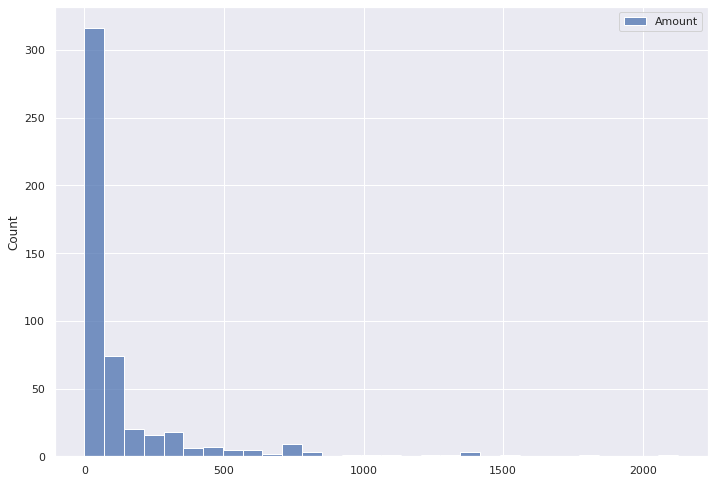

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=amount_fraud, bins=30)
plt.show()

In [82]:
data= df.drop(['Time'], axis=1)

In [83]:
# Drop unnecessary columns
X= data.drop(['Class'], axis=1).values
print(X.shape)

(284807, 29)


### Splitting the data into train & test data

In [84]:
y= df.Class.values
print(y.shape)

(284807,)


In [85]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [86]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

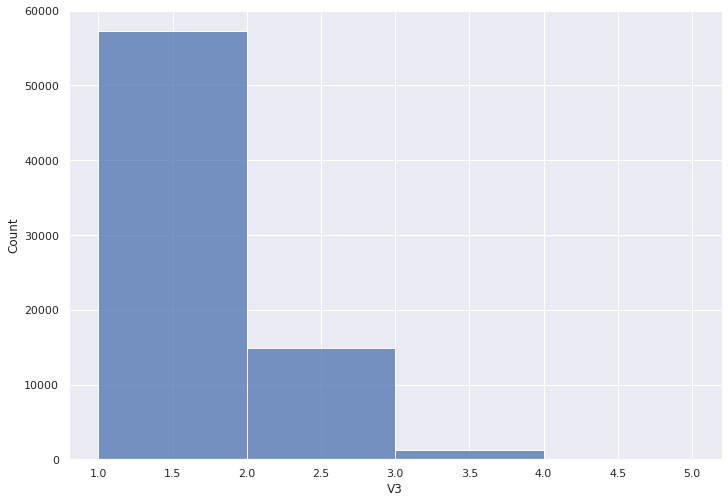

In [87]:
# plot the histogram of a variable from the dataset to see the skewness
sns.histplot(df.V3, bins=[1, 2, 3, 4, 5])
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [88]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)    
X_test_pt = pt.transform(X_test)

#pt_y = PowerTransformer(copy= False)

#pt_y.fit(y_train.to_frame())
 
#y_train_pt = pt_y.transform(y_train.to_frame())
#y_test_pt = pt_y.transform(y_test.to_frame())

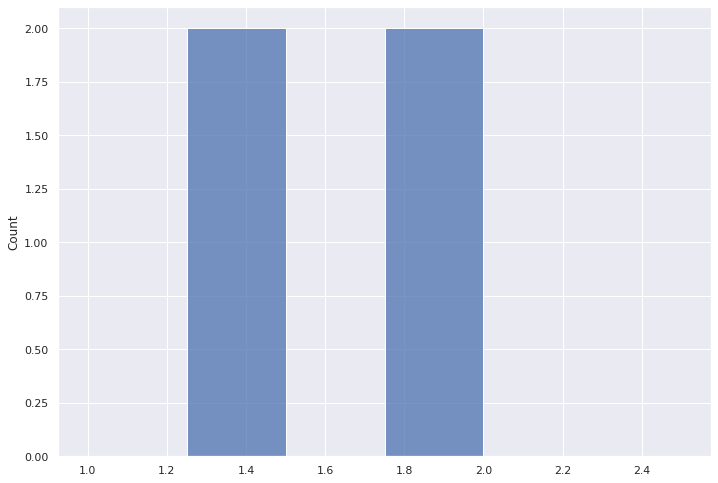

In [89]:
# plot the histogram of a variable from the dataset again to see the result 
sns.histplot(X_train_pt[3], bins=[1.0,1.25,1.50,1.75,2.0, 2.5])
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [90]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package

num_C = 10 #--> list of values
cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [91]:
from sklearn.metrics import roc_auc_score
#perform cross validation
clf = LogisticRegressionCV(Cs=num_C, cv=cv_num)
clf.fit(X_train_pt, y_train)
clf_pred = clf.predict(X_test_pt)
#print the evaluation result by choosing a evaluation metric
acc= roc_auc_score(y_test, clf_pred)
print(acc)
#print the optimum value of hyperparameters

0.8111453536113375


In [ ]:
#perform hyperparameter tuning
num_C_2 = 5 #--> list of values
cv_num_2 = 10  #--> list of values
#perform cross validation
clf_2 = LogisticRegressionCV(Cs=num_C_2, cv=cv_num_2)
clf_2.fit(X_train_pt, y_train)
clf_pred_2 = clf_2.predict(X_test_pt)
#print the evaluation result by choosing a evaluation metric
acc_2= roc_auc_score(y_test, clf_pred_2)
print(acc_2)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train_pt, y_train)
KNN_pred = KNN.predict(X_test_pt)
KNN_acc= roc_auc_score(y_test, KNN_pred)
print(KNN_acc)

In [ ]:
#SVM
from sklearn.svm import SVC 
SVM = SVC()
SVM.fit(X_train_pt, y_train)
SVM_pred = SVM.predict(X_test_pt)
SVM_acc= roc_auc_score(y_test, SVM_pred)
print(SVM_acc)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train_pt, y_train)
DT_pred = DT.predict(X_test_pt)
DT_acc= roc_auc_score(y_test, DT_pred)
print(DT_acc)


In [ ]:
#Decision Tree (Gini)
from sklearn.tree import DecisionTreeClassifier 
DT_2 = DecisionTreeClassifier(max_depth = 4)
DT_2.fit(X_train_pt, y_train)
DT_pred_2 = DT_2.predict(X_test_pt)
DT_acc_2= roc_auc_score(y_test, DT_pred_2)
print(DT_acc_2)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(max_depth = 4)
RF.fit(X_train_pt, y_train)
RF_pred = RF.predict(X_test_pt)
RF_acc= roc_auc_score(y_test, RF_pred)
print(RF_acc)

In [ ]:
#ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(X_train_pt, y_train)
Ada_pred = Ada.predict(X_test_pt)
Ada_acc= roc_auc_score(y_test, Ada_pred)
print(Ada_acc)

In [ ]:
#XGBoost
from xgboost import XGBClassifier 
XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_train_pt, y_train)
XGB_pred = XGB.predict(X_test_pt)
XGB_acc= roc_auc_score(y_test, XGB_pred)
print(XGB_acc)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = XGBClassifier(max_depth = 4)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test_pt)
clf_acc= roc_auc_score(y_test, clf_pred)
print(clf_acc) #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

#X_train_1 = X_train.where(y_train==1.0)
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
x1= (y_train == 1)
x2= (y_train == 0)
X_train_1= X_train[x1]
X_train_0= X_train[x2]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression

num_C = 10  #--> list of values
cv_num = 5   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
skf= cv.get_n_splits(X, y)
print(skf)

In [ ]:
for train_index, test_index in cv.split(X, y):
...     print("TRAIN:", train_index, "TEST:", test_index)
X_train_cv, X_test_cv = X[train_index], X[test_index]
y_train_cv, y_test_cv = y[train_index], y[test_index]

In [ ]:
model = LogisticRegressionCV(Cs=num_C, cv=cv_num)
#model.fit(X_train_cv, y_train_cv)

scores = cross_val_score(model, X_train_cv, y_train_cv, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train_cv, y_train_cv)
#plt.pie(y_res)
#plt.show()




### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_res, y_res)
KNN_pred_cv = KNN.predict(X_test_cv)
KNN_acc_cv= roc_auc_score(y_test_cv, KNN_pred_cv)
print(KNN_acc_cv)

In [ ]:
#SVM
from sklearn.svm import SVC 
SVM = SVC()
SVM.fit(X_res, y_res)
SVM_pred_cv = SVM.predict(X_test_cv)
SVM_acc_cv= roc_auc_score(y_test_cv, SVM_pred_cv)
print(SVM_acc_cv)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_res, y_res)
DT_pred_cv = DT.predict(X_test_cv)
DT_acc=_cv roc_auc_score(y_test_cv, DT_pred_cv)
print(DT_acc_cv)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(max_depth = 4)
RF.fit(X_res, y_res)
RF_pred_cv = RF.predict(X_test_cv)
RF_acc_cv= roc_auc_score(y_test_cv, RF_pred_cv)
print(RF_acc_cv)

In [ ]:
#ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(X_res, y_res)
Ada_pred_cv = Ada.predict(X_test_cv)
Ada_acc_cv= roc_auc_score(y_test_cv, Ada_pred_cv)
print(Ada_acc_cv)

In [ ]:
#XGBoost
from xgboost import XGBClassifier 
XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_res, y_res)
XGB_pred_cv = XGB.predict(X_test_cv)
XGB_acc_cv= roc_auc_score(y_test_cv, XGB_pred_cv)
print(XGB_acc_cv)

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
x1= (y_train == 1)
x2= (y_train == 0)
X_train_1= X_train[x1]
X_train_0= X_train[x2]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [1]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
x1= (y_train == 1)
x2= (y_train == 0)
X_train_1= X_train[x1]
X_train_0= X_train[x2]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

NameError: ignored

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

#X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
#X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]
x1= (y_train == 1)
x2= (y_train == 0)
X_train_1= X_train[x1]
X_train_0= X_train[x2]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)